# 데이터 EDA

In [4]:
import pandas as pd
from matplotlib import pyplot as plt

from tqdm import tqdm

In [5]:
train_path = '../data/train_pg.csv'

df = pd.read_csv(train_path)
dev = pd.read_csv('../data/dev.csv')
test = pd.read_csv('../data/test.csv')

df.head()

,id,source,sentence_1,sentence_2,label,binary-label
0,boostcamp-sts-v1-train-000,nsmc-sampled,스릴도있고 반전도 있고 여느 한국영화 쓰레기들하고는 차원이 다르네요~,"반전도 있고,사랑도 있고재미도있네요.",2.2,0.0
1,boostcamp-sts-v1-train-001,slack-rtt,앗 제가 접근권한이 없다고 뜹니다;;,"오, 액세스 권한이 없다고 합니다.",4.2,1.0
2,boostcamp-sts-v1-train-002,petition-sampled,주택청약조건 변경해주세요.,주택청약 무주택기준 변경해주세요.,2.4,0.0
3,boostcamp-sts-v1-train-003,slack-sampled,입사후 처음 대면으로 만나 반가웠습니다.,화상으로만 보다가 리얼로 만나니 정말 반가웠습니다.,3.0,1.0
4,boostcamp-sts-v1-train-004,slack-sampled,뿌듯뿌듯 하네요!!,꼬옥 실제로 한번 뵈어요 뿌뿌뿌~!~!,0.0,0.0


In [10]:
# pandas 데이터를 가지고 그래프를 그리는 함수입니다
def draw_graph(df):
    source_binary = {source:[0, 0] for source in sorted(df['source'].unique())}
    for i, item in df.iterrows():
        source_binary[item['source']][int(item['binary-label'])] += 1
    source_binary_df = pd.DataFrame(source_binary).transpose()

    # 서브플롯 설정
    fig, axes = plt.subplots(2, 2, figsize=(12, 12))
    fig.tight_layout(pad=4.0)

    # source의 분포
    df['source'].value_counts().plot(kind='bar', rot=20, ax=axes[0, 0])
    axes[0, 0].set_title("Source Distribution")

    # source별 binary label의 분포
    source_binary_df.plot(kind='bar', rot=20, ax=axes[0, 1])
    axes[0, 1].set_title("Binary Label Distribution by Source")

    # label의 분포
    df['label'].plot(kind='hist', rot=20, ax=axes[1, 0])
    axes[1, 0].set_title("Label Distribution")

    # binary label의 분포
    df['binary-label'].value_counts().plot(kind='bar', rot=20, ax=axes[1, 1])
    axes[1, 1].set_title("Binary Label Distribution")

    # 피겨 보여주기
    plt.show()

In [17]:
# train_data.to_csv('binary_train.csv', index=False)
# val_data.to_csv('label_train.csv', index=False)

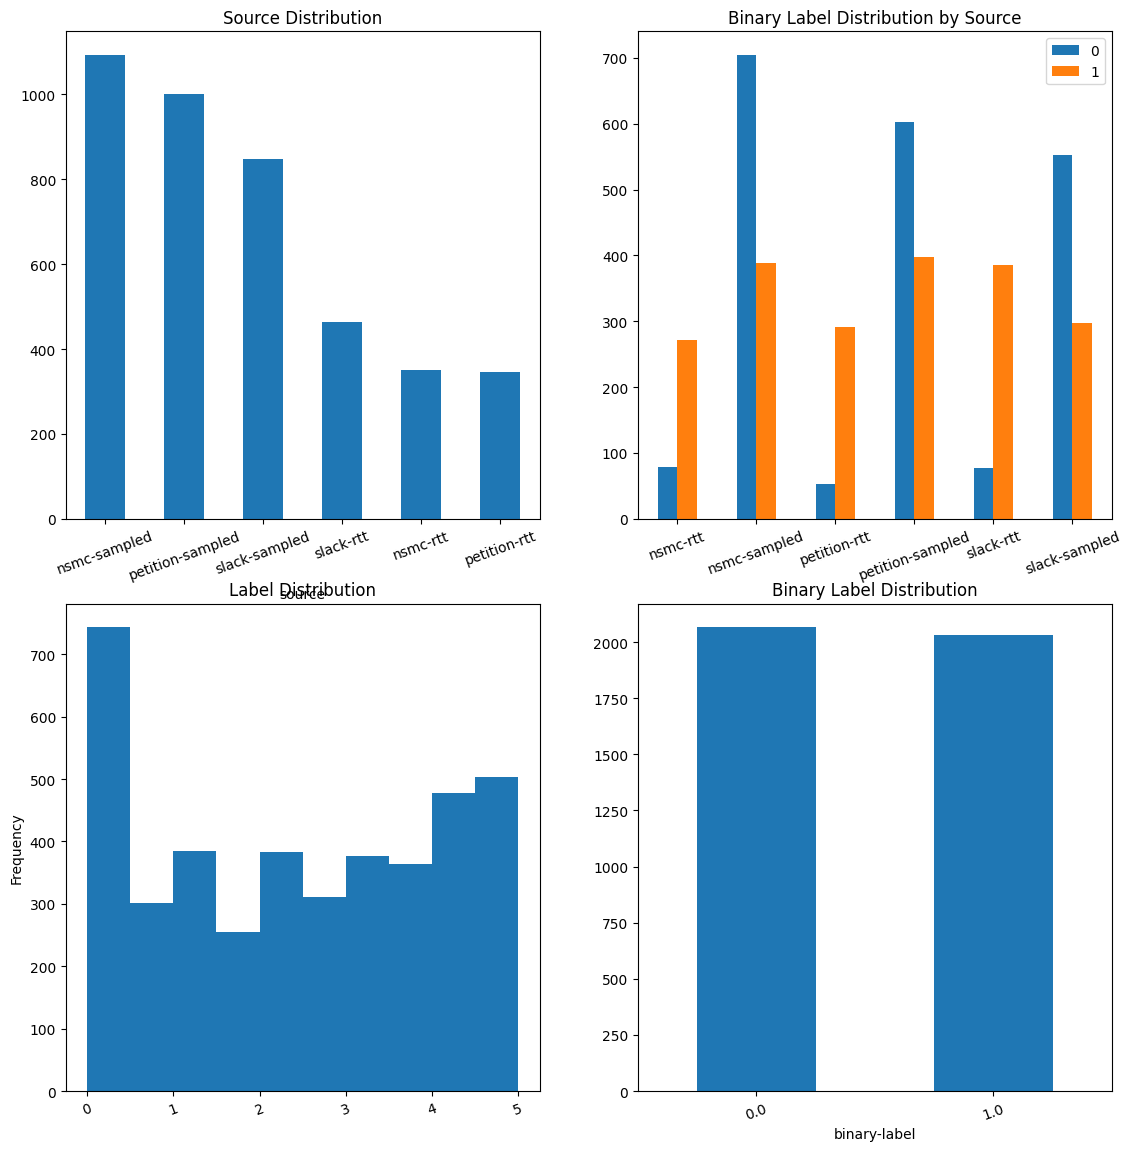

In [15]:
draw_graph(train_data)

In [87]:
# 0 label 개수
len(df[df['label'] <= 0.3])

2464

In [24]:
def draw_source_graph(df):
    # 서브플롯 설정
    nrows, ncols = 2, 3

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 8))
    fig.tight_layout(pad=4.0)

    # source 별로 그래프 그리기
    for i, s in enumerate(df['source'].unique()):
        row = i // ncols
        col = i % ncols

        # 서브플롯에 히스토그램 그리기
        ax = axes[row, col]
        df[df['source'] == s]['label'].plot(kind='hist', rot=20, ax=ax)
        ax.set_title(s)

    # 피겨 보여주기
    plt.show()

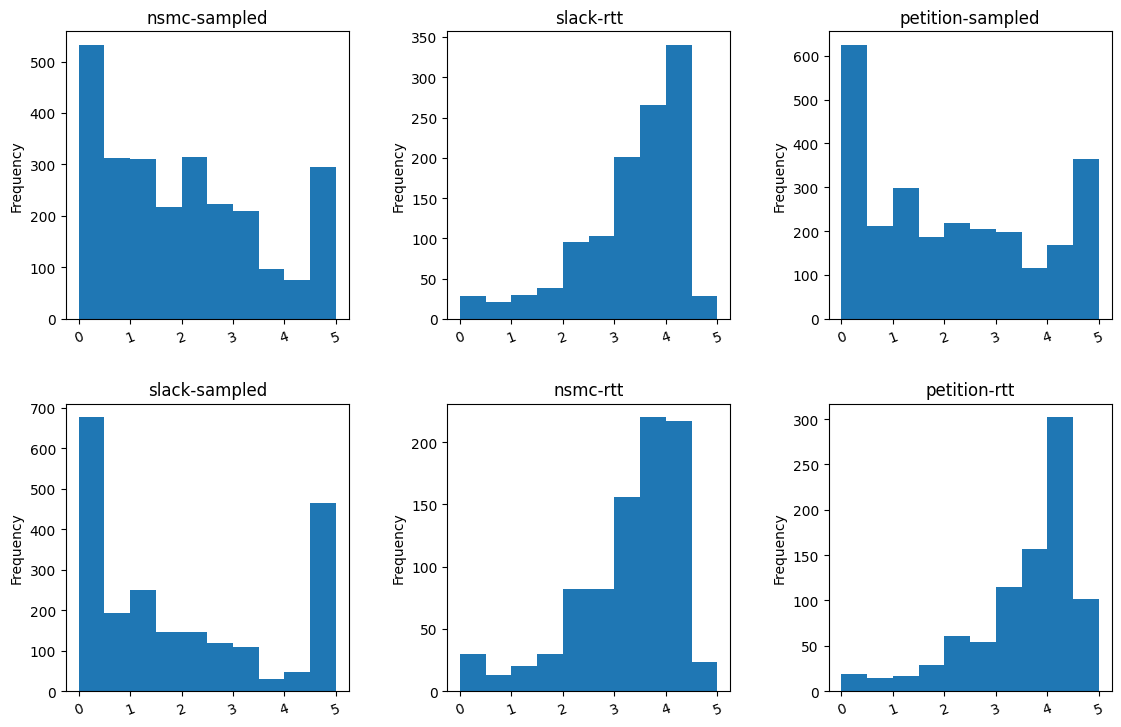

In [61]:
draw_source_graph(df)

# *-sampled 데이터 0.5 이하 조지기

In [90]:
len(df[(df['source'] == 'petition-sampled') & (df['label'] <= 0.5 )])

954

In [91]:
df_sampling = df.copy()
for s in df_sampling['source'].unique():
    if 'sampled' in s:
        filter_df = df_sampling[(df_sampling['source'] == s) & (df_sampling['label'] <= 0.5 )]
        sampling_df = filter_df.sample(len(filter_df) - len(filter_df) // 3)
        
        df_sampling = df_sampling.drop(sampling_df.index)

In [92]:
len(df_sampling)

7388

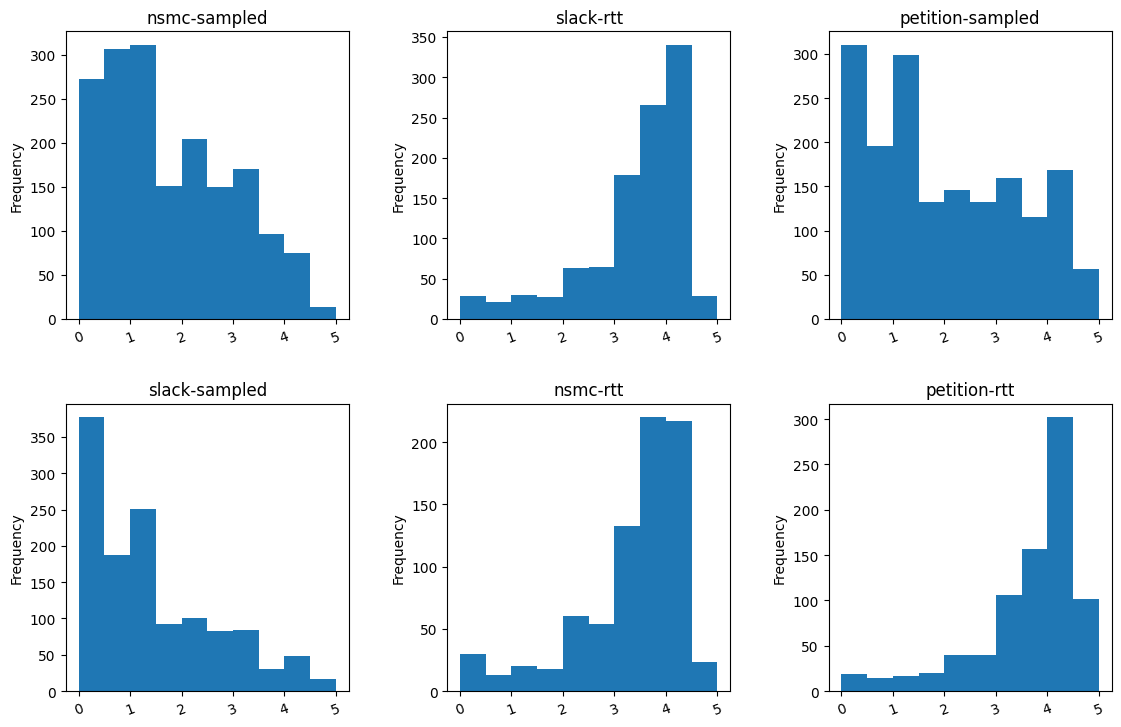

In [93]:
draw_source_graph(df_sampling)

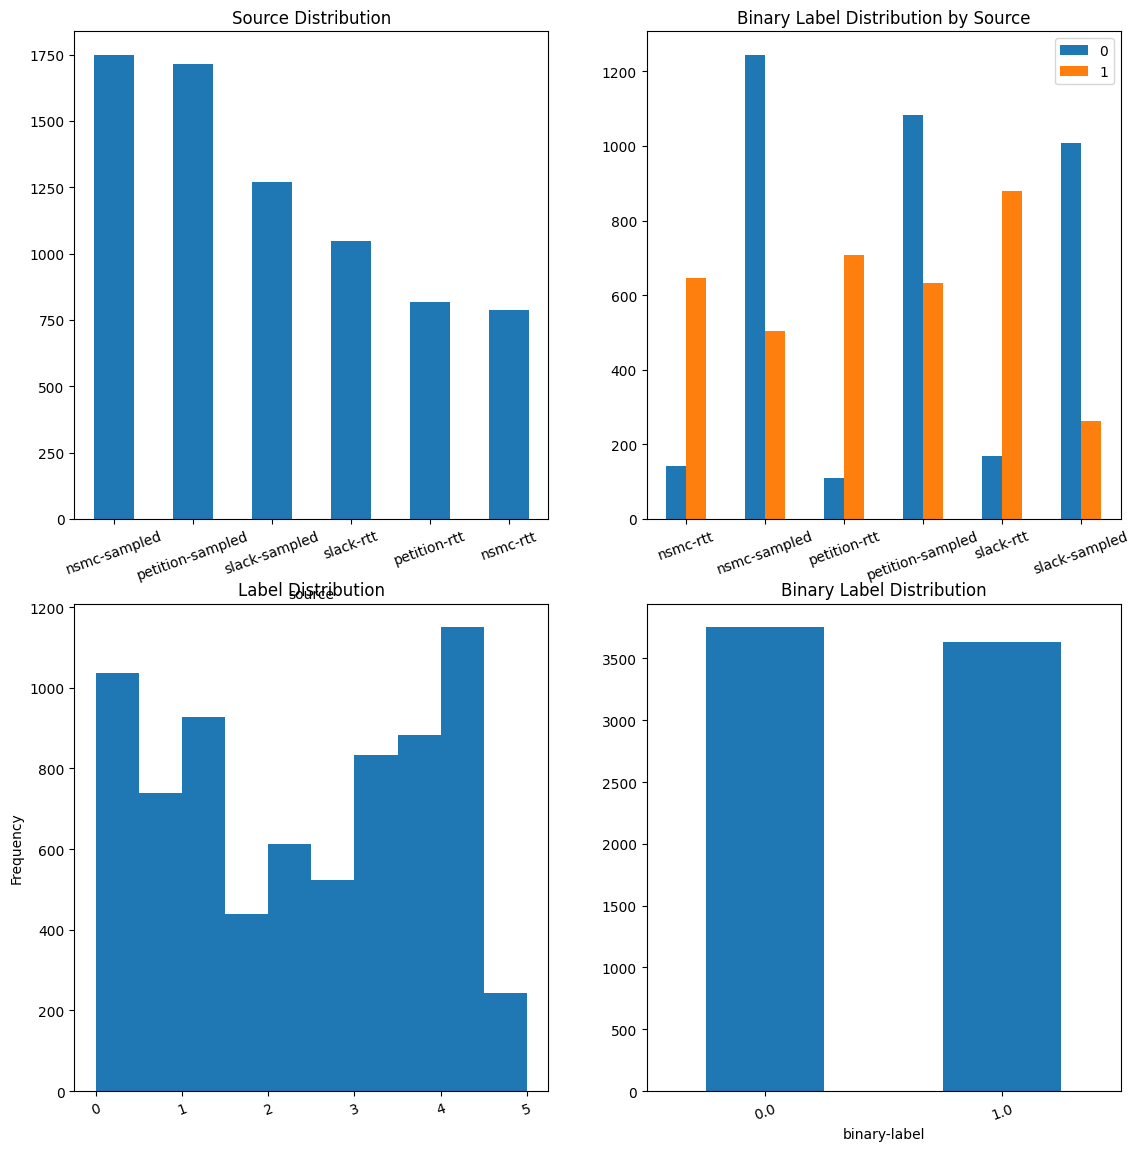

In [94]:
draw_graph(df_sampling)

# 분석
- 모든 데이터 문장 스왑 해주고, 라벨 값이 1.5 ~ 3.0, 4.5 ~ 5.0 값은 pororo 사용

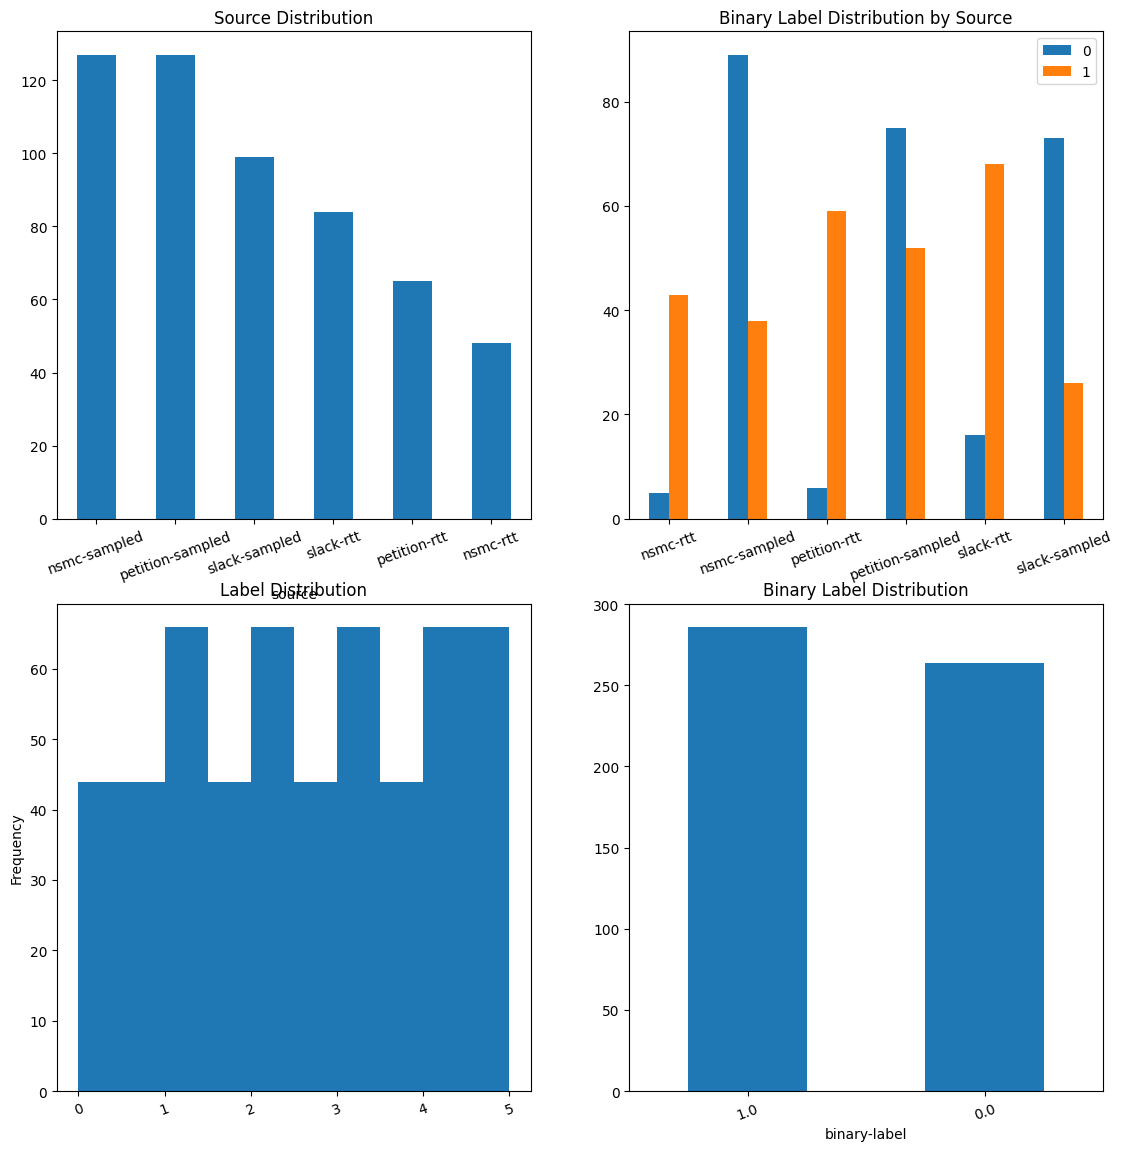

In [26]:
draw_graph(dev)

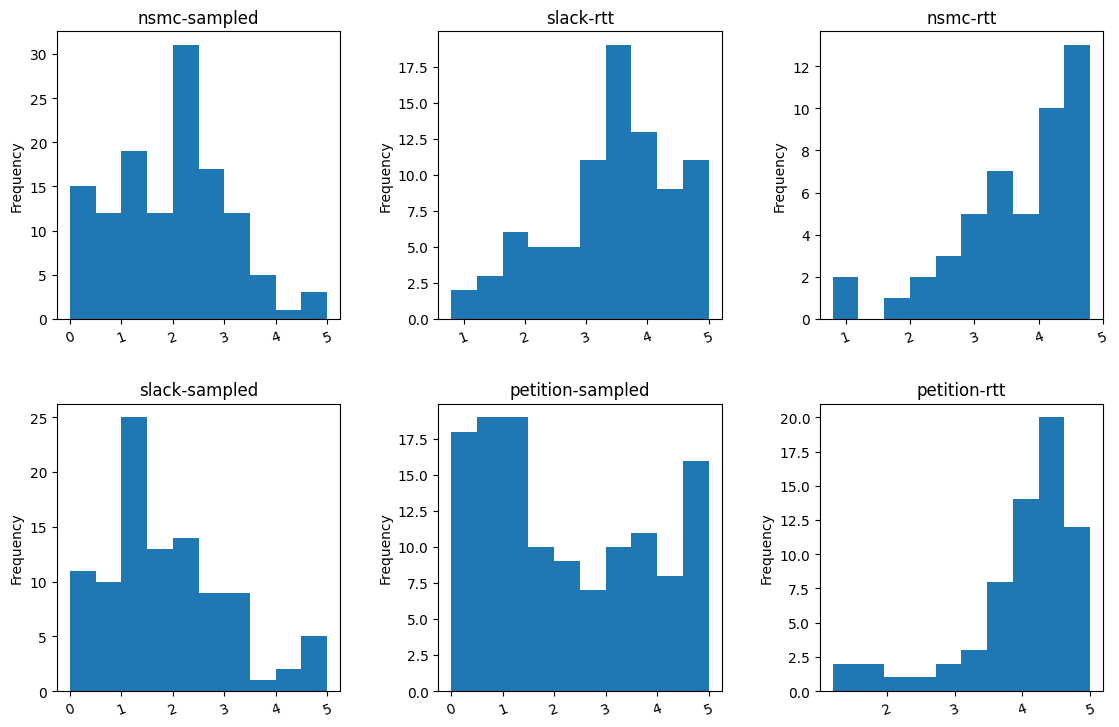

In [27]:
draw_source_graph(dev)

In [97]:
# pandas 데이터를 가지고 그래프를 그리는 함수입니다
def draw_test_graph(df):
    # source의 분포
    df['source'].value_counts().plot(kind='bar', rot=20, figsize=(4, 3))
    plt.show()

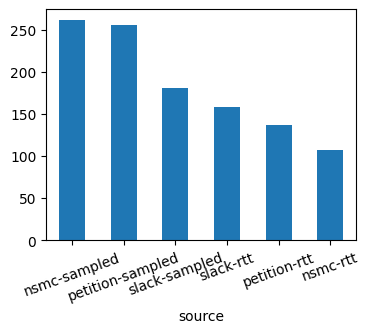

In [98]:
draw_test_graph(test)

# 증대 데이터 시각화

In [99]:
df_aug = pd.read_csv('../data/train_aug.csv')

df_aug.head()

,id,source,sentence_1,sentence_2,label,binary-label
0,boostcamp-sts-v1-train-000,nsmc-sampled,스릴도있고 반전도 있고 여느 한국영화 쓰레기들하고는 차원이 다르네요~,"반전도 있고,사랑도 있고재미도있네요.",2.2,0.0
1,boostcamp-sts-v1-train-001,slack-rtt,앗 제가 접근권한이 없다고 뜹니다;;,"오, 액세스 권한이 없다고 합니다.",4.2,1.0
2,boostcamp-sts-v1-train-002,petition-sampled,주택청약조건 변경해주세요.,주택청약 무주택기준 변경해주세요.,2.4,0.0
3,boostcamp-sts-v1-train-003,slack-sampled,입사후 처음 대면으로 만나 반가웠습니다.,화상으로만 보다가 리얼로 만나니 정말 반가웠습니다.,3.0,1.0
4,boostcamp-sts-v1-train-004,slack-sampled,뿌듯뿌듯 하네요!!,꼬옥 실제로 한번 뵈어요 뿌뿌뿌~!~!,0.0,0.0


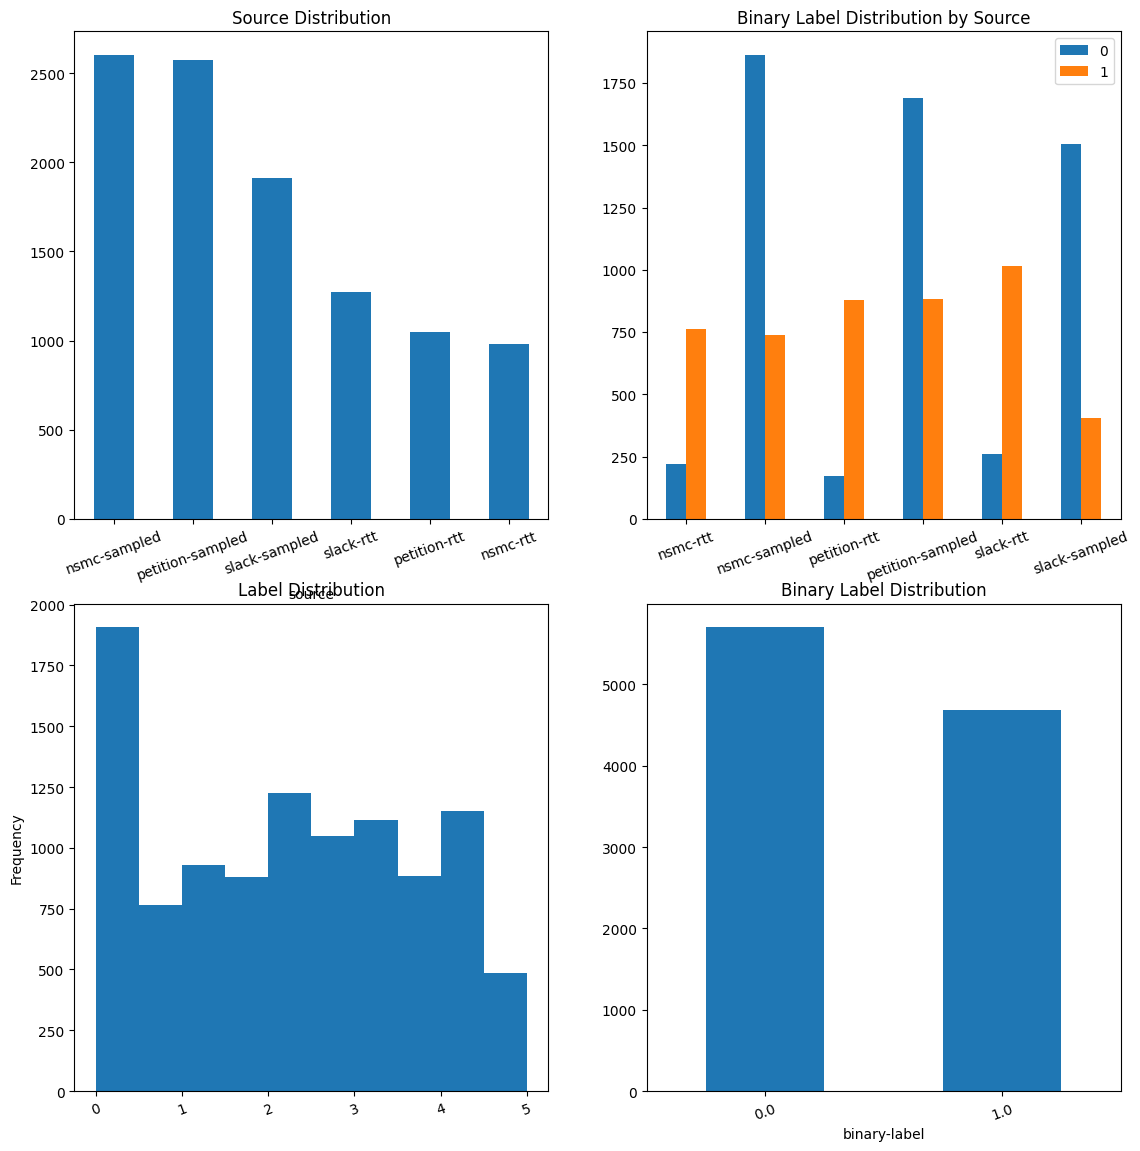

In [100]:
draw_graph(df_aug)

# 맞춤법 수정

In [3]:
from hanspell import spell_checker

In [44]:
text = "306090 발표 날만을 위해 머리 열심히 굴려봤습니다."

hanspell_sent = spell_checker.check(text)
print(hanspell_sent.checked)


306090 발표 날만을 위해 머리 열심히 굴려봤습니다.


In [55]:
data = df.copy()
data_dev = dev.copy()
data_test = test.copy()


In [56]:
# XML 파싱 전 텍스트 전처리
def preprocess_xml_text(text):
    return text.replace("&", "&amp; ")

tqdm.pandas()

# data.loc[:, 'sentence_1'] = data.loc[:, 'sentence_1'].progress_apply(preprocess_xml_text)
# data.loc[:, 'sentence_2'] = data.loc[:, 'sentence_2'].progress_apply(preprocess_xml_text)

data_dev.loc[:, 'sentence_1'] = data_dev.loc[:, 'sentence_1'].progress_apply(preprocess_xml_text)
data_dev.loc[:, 'sentence_2'] = data_dev.loc[:, 'sentence_2'].progress_apply(preprocess_xml_text)

data_test.loc[:, 'sentence_1'] = data_test.loc[:, 'sentence_1'].progress_apply(preprocess_xml_text)
data_test.loc[:, 'sentence_2'] = data_test.loc[:, 'sentence_2'].progress_apply(preprocess_xml_text)

100%|██████████| 1100/1100 [00:00<00:00, 569385.96it/s]


In [57]:
tqdm.pandas()

def check_spell(sentence): # 1353
    return spell_checker.check(sentence).checked

# data.loc[:, 'sentence_1'] = data.loc[:, 'sentence_1'].progress_apply(check_spell)
# data.loc[:, 'sentence_2'] = data.loc[:, 'sentence_2'].progress_apply(check_spell)
data_dev.loc[:, 'sentence_1'] = data_dev.loc[:, 'sentence_1'].progress_apply(check_spell)
data_dev.loc[:, 'sentence_2'] = data_dev.loc[:, 'sentence_2'].progress_apply(check_spell)
data_test.loc[:, 'sentence_1'] = data_test.loc[:, 'sentence_1'].progress_apply(check_spell)
data_test.loc[:, 'sentence_2'] = data_test.loc[:, 'sentence_2'].progress_apply(check_spell)


100%|██████████| 1100/1100 [00:27<00:00, 40.39it/s]


In [58]:
# data.to_csv('train_spellCheck.csv', index=False)
data_dev.to_csv('dev_spellCheck.csv', index=False)
data_test.to_csv('test_spellCheck.csv', index=False)

# 띄어쓰기 수정

In [59]:
train_path = '../data/train_spellCheck.csv'

df = pd.read_csv(train_path)
dev = pd.read_csv('../data/dev_spellCheck.csv')
test = pd.read_csv('../data/test_spellCheck.csv')

In [60]:
data = df.copy()
data_dev = dev.copy()
data_test = test.copy()

In [61]:
from pykospacing import Spacing
spacing = Spacing()


In [65]:
data.loc[:, 'sentence_1'] = data.loc[:, 'sentence_1'].progress_apply(spacing)
data.loc[:, 'sentence_2'] = data.loc[:, 'sentence_2'].progress_apply(spacing)
data_dev.loc[:, 'sentence_1'] = data_dev.loc[:, 'sentence_1'].progress_apply(spacing)
data_dev.loc[:, 'sentence_2'] = data_dev.loc[:, 'sentence_2'].progress_apply(spacing)
data_test.loc[:, 'sentence_1'] = data_test.loc[:, 'sentence_1'].progress_apply(spacing)
data_test.loc[:, 'sentence_2'] = data_test.loc[:, 'sentence_2'].progress_apply(spacing)

100%|██████████| 1100/1100 [01:10<00:00, 15.55it/s]


In [66]:
data.to_csv('train_spellCheck.csv', index=False)
data_dev.to_csv('dev_spellCheck.csv', index=False)
data_test.to_csv('test_spellCheck.csv', index=False)

# 중복 문자 축약

In [68]:
train_path = '../data/train_spellCheck.csv'

df = pd.read_csv(train_path)
dev = pd.read_csv('../data/dev_spellCheck.csv')
test = pd.read_csv('../data/test_spellCheck.csv')

In [69]:
data = df.copy()
data_dev = dev.copy()
data_test = test.copy()

In [96]:
from soynlp.normalizer import repeat_normalize
import re

In [70]:
def repeat_norm(sentence):
    return repeat_normalize(sentence, num_repeats=2)

In [102]:
def shorten_repeated_chars(text):
    # 문자 축약
    patterns = {
        r'!+': '!',  
        r'~+': '~',  
        r';+': ';',   
        r'\?+': '?',   
        r'\^+': '^^',
        r'\.+': '..'
    }

    # Apply each pattern to the text
    for pattern, replacement in patterns.items():
        text = re.sub(pattern, replacement, text)

    return text

In [71]:
data.loc[:, 'sentence_1'] = data.loc[:, 'sentence_1'].progress_apply(repeat_norm)
data.loc[:, 'sentence_2'] = data.loc[:, 'sentence_2'].progress_apply(repeat_norm)
data_dev.loc[:, 'sentence_1'] = data_dev.loc[:, 'sentence_1'].progress_apply(repeat_norm)
data_dev.loc[:, 'sentence_2'] = data_dev.loc[:, 'sentence_2'].progress_apply(repeat_norm)
data_test.loc[:, 'sentence_1'] = data_test.loc[:, 'sentence_1'].progress_apply(repeat_norm)
data_test.loc[:, 'sentence_2'] = data_test.loc[:, 'sentence_2'].progress_apply(repeat_norm)

100%|██████████| 1100/1100 [00:00<00:00, 122276.43it/s]


In [103]:
data.loc[:, 'sentence_1'] = data.loc[:, 'sentence_1'].progress_apply(shorten_repeated_chars)
data.loc[:, 'sentence_2'] = data.loc[:, 'sentence_2'].progress_apply(shorten_repeated_chars)
data_dev.loc[:, 'sentence_1'] = data_dev.loc[:, 'sentence_1'].progress_apply(shorten_repeated_chars)
data_dev.loc[:, 'sentence_2'] = data_dev.loc[:, 'sentence_2'].progress_apply(shorten_repeated_chars)
data_test.loc[:, 'sentence_1'] = data_test.loc[:, 'sentence_1'].progress_apply(shorten_repeated_chars)
data_test.loc[:, 'sentence_2'] = data_test.loc[:, 'sentence_2'].progress_apply(shorten_repeated_chars)

100%|██████████| 1100/1100 [00:00<00:00, 96732.10it/s]


In [112]:
# 같은 문장 라벨 수정
data.loc[data['sentence_1'] == data['sentence_2'], 'label'] = 5.0

In [114]:
data.to_csv('train_spellCheck_repeatNorm.csv', index=False)
data_dev.to_csv('dev_spellCheck_repeatNorm.csv', index=False)
data_test.to_csv('test_spellCheck_repeatNorm.csv', index=False)